In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind, mannwhitneyu,chi2_contingency,f_oneway
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

In [30]:
# Load the dataset
data = pd.read_csv('D:/Scaler/Scaler Modules/DSML Portfolio Project/Network Anomaly Detection/Network_anomaly_data.csv')

# Step 1: Exploratory Data Analysis (EDA)

In [3]:
# Display basic statistics
data.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

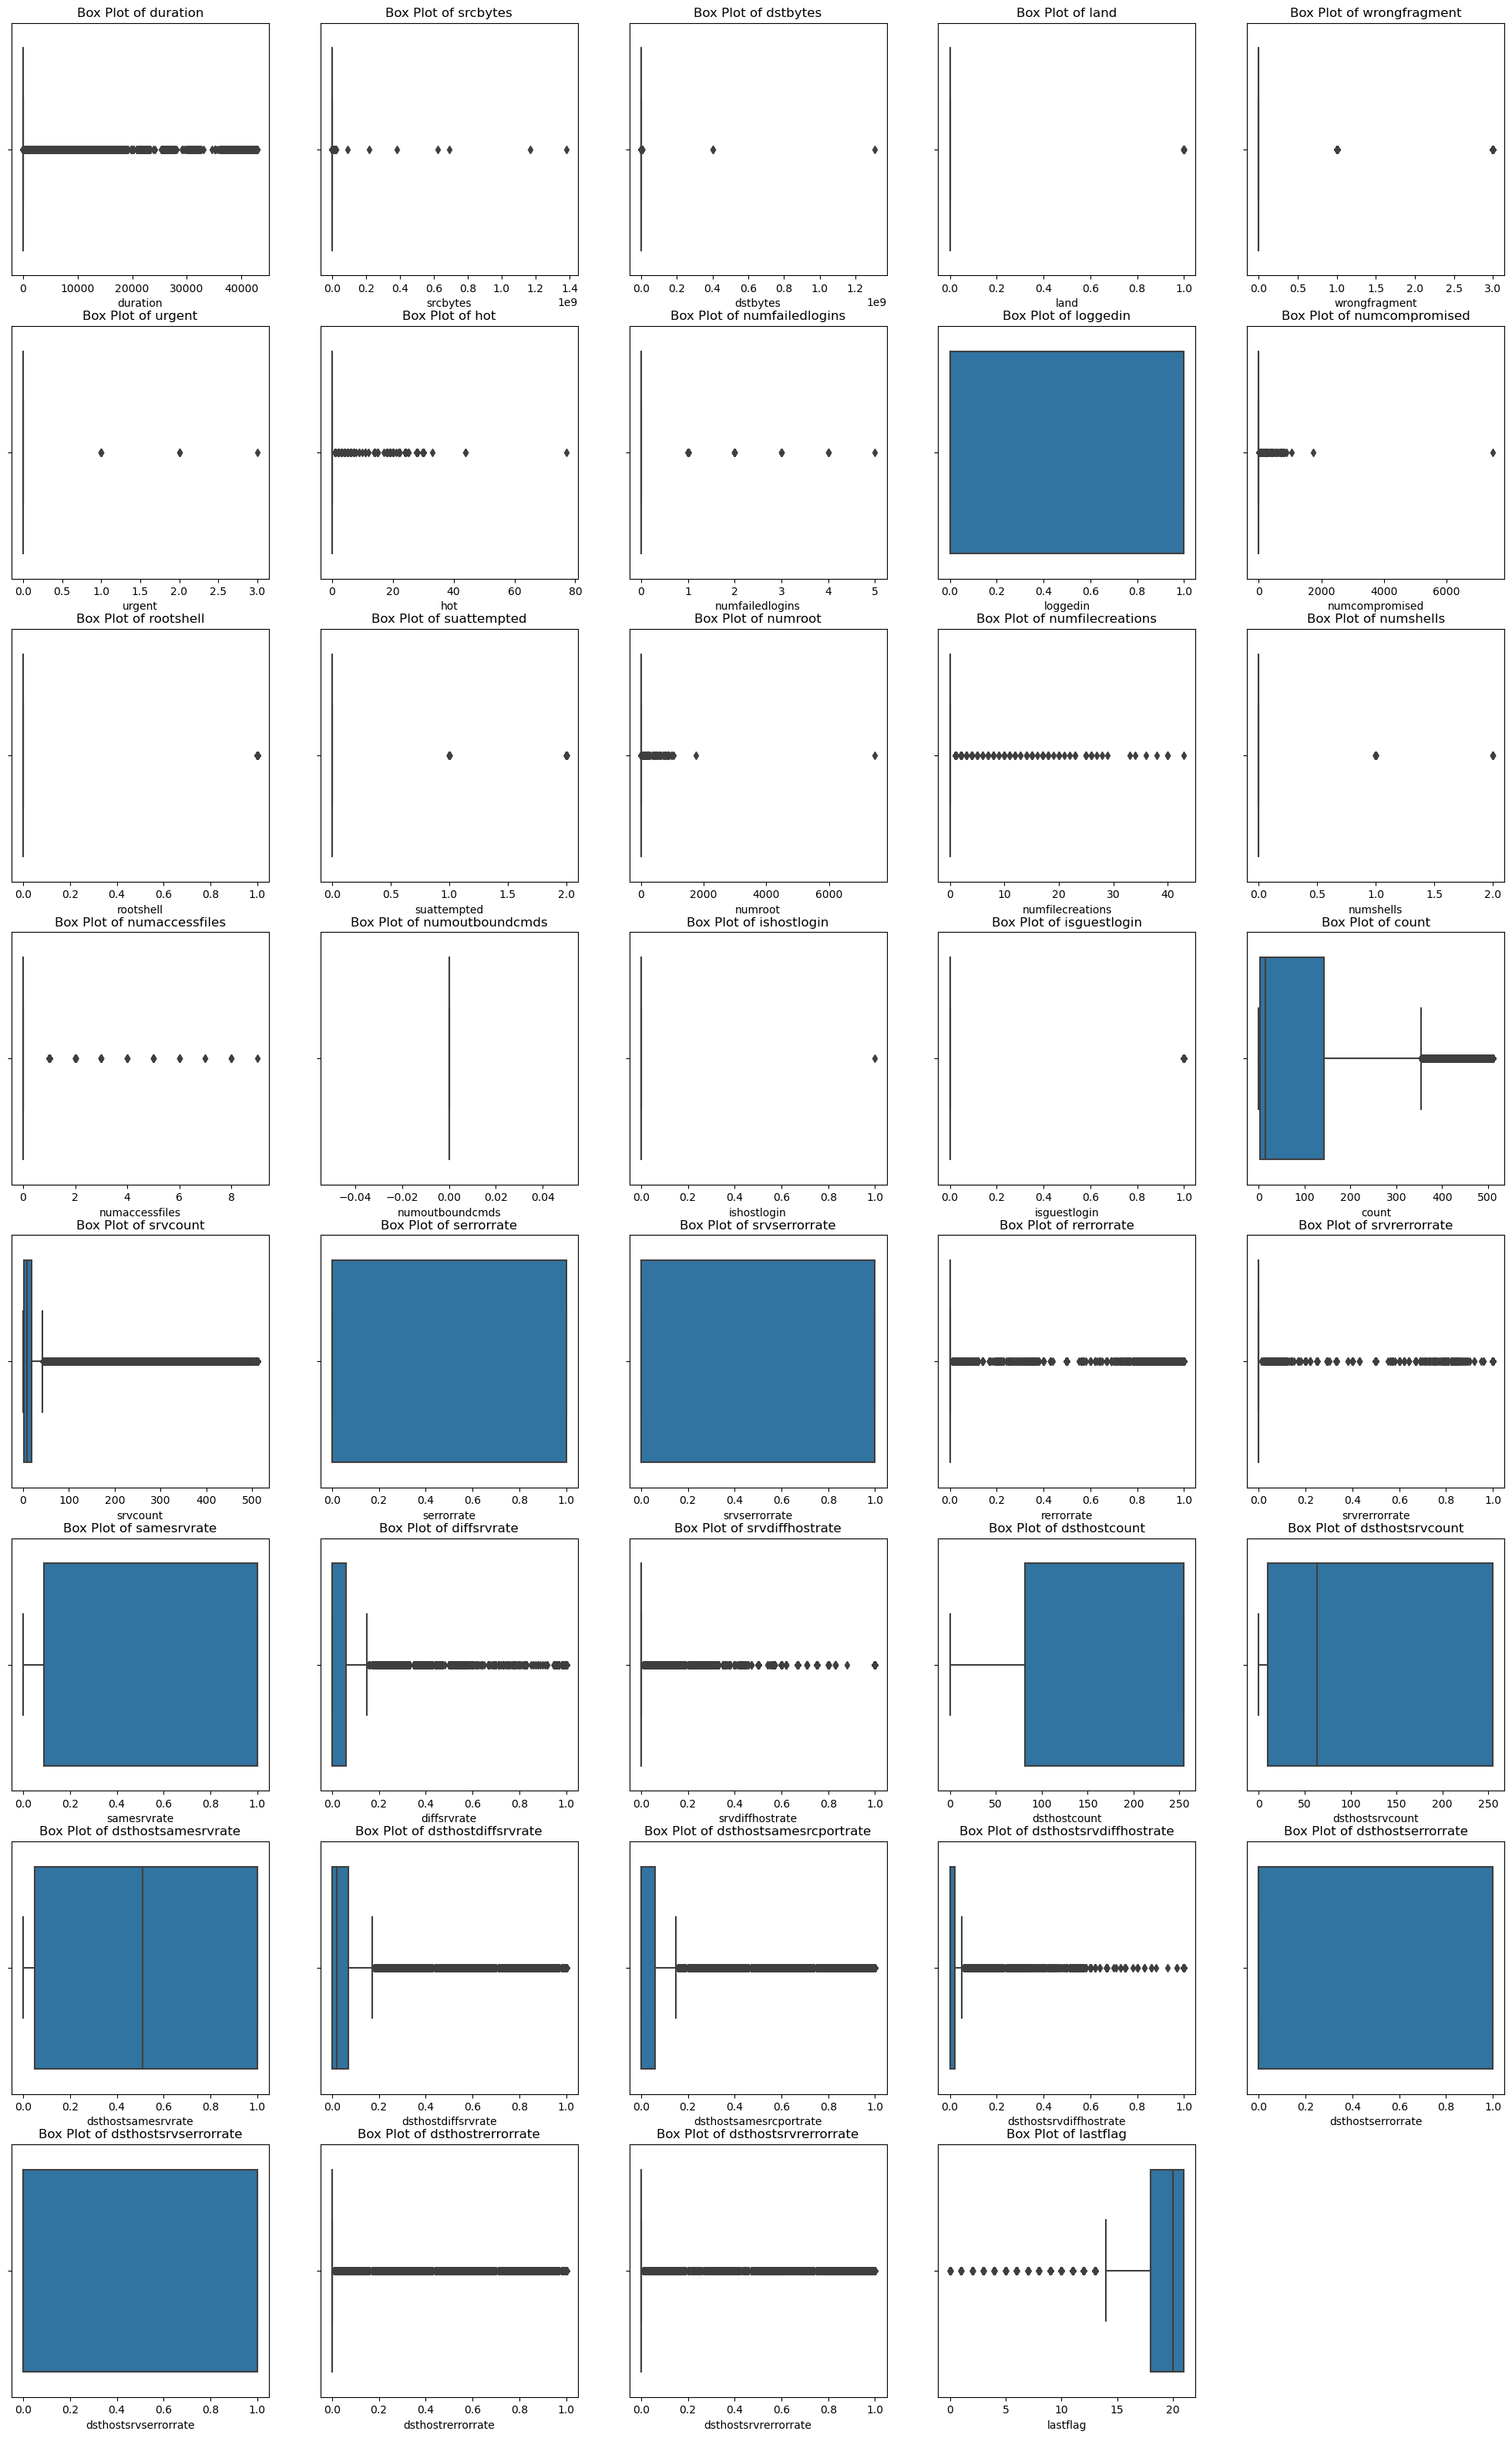

In [5]:
# Loop through numerical columns to plot boxplots
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(25, 40))

for i, col in enumerate(num_cols, 1):
    plt.subplot(8, 5, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')

# plt.tight_layout()
plt.show()

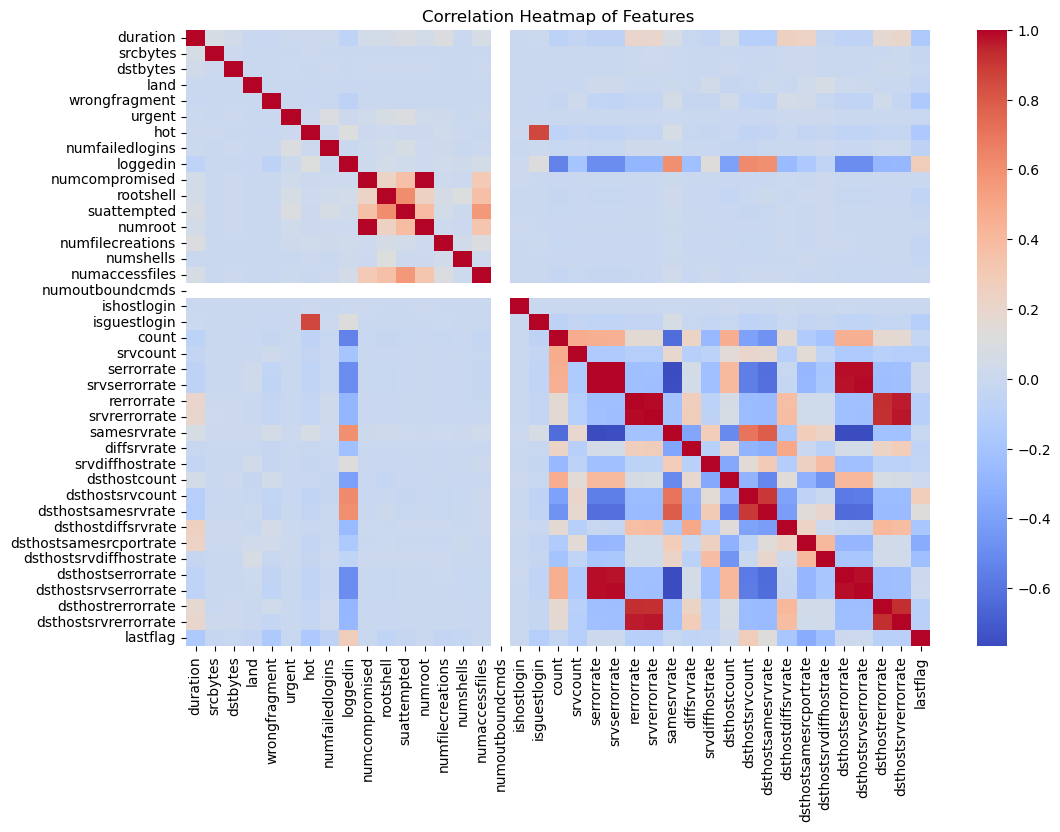

In [8]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

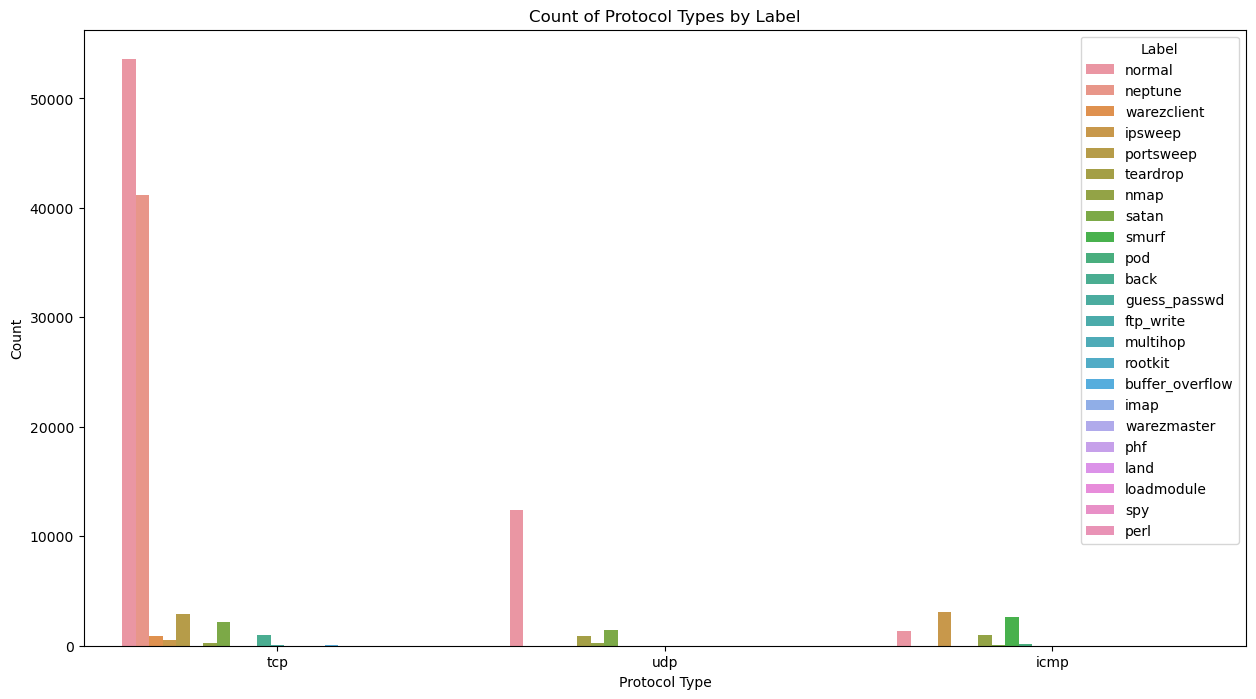

In [14]:
# Count plot for categorical variables, if any
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='protocoltype', hue='attack')
plt.title("Count of Protocol Types by Label")
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.legend(title="Label", loc='upper right')
plt.show()

In [16]:

categorical_features = ['protocoltype', 'service', 'flag']

for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['attack'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}: chi2 = {chi2}, p-value = {p}")
    # A p-value < 0.05 indicates a significant association.


Chi-square test for protocoltype: chi2 = 110962.04754876824, p-value = 0.0
Chi-square test for service: chi2 = 350657.88534601394, p-value = 0.0
Chi-square test for flag: chi2 = 238052.84577002664, p-value = 0.0


In [27]:
numeric_features = ['srcbytes', 'dstbytes', 'duration', 'count', 'samesrvrate']
for feature in numeric_features:
    categories = [data[data['service'] == service][feature] for service in data['service'].unique()]
    f_stat, p_val = f_oneway(*categories)
    print(f"ANOVA for {feature} across service: F-statistic = {f_stat}, p-value = {p_val}")
    

ANOVA for srcbytes across service: F-statistic = 1.260377138658937, p-value = 0.07093147645246173
ANOVA for dstbytes across service: F-statistic = 0.34272950798226337, p-value = 0.9999999354882029
ANOVA for duration across service: F-statistic = 105.02738637127739, p-value = 0.0
ANOVA for count across service: F-statistic = 1789.466443980253, p-value = 0.0
ANOVA for samesrvrate across service: F-statistic = 4164.330503619806, p-value = 0.0


# Step 2: Data Preprocessing

In [31]:
# AS annova results incated that 'dstbytes' had no significant impact on attack droping 'dstbytes'  column
data.drop(columns=['dstbytes'],inplace=True,axis=0)

In [32]:
# Encode categorical variables
# Convert 'protocoltype', 'service', 'flag' columns to numerical using one-hot encoding and frequency encoding
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(data[['protocoltype']])
one_hot_encoded_data = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['protocoltype']))
data = pd.concat([data.drop('protocoltype', axis=1), one_hot_encoded_data], axis=1)
flag_freq_encoding = data['flag'].value_counts(normalize=True)
data['flag_encoded'] = data['flag'].map(flag_freq_encoding)
data = data.drop('flag', axis=1)
service_encoding = data['service'].value_counts(normalize=True)
data['service_encoded'] = data['service'].map(service_encoding)
data = data.drop('service', axis=1)

In [33]:
# Label encode target variable 'attack' (assuming it's the target)
# We assume 'attack' column has "normal" and various attack types, so we encode it as 0 (normal) and 1 (attack)
data['attack'] = data['attack'].apply(lambda x: 0 if x == 'normal' else 1)

In [34]:
# Split features and target
X = data.drop(columns=['attack'])
y = data['attack']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(y.value_counts())

0    67343
1    58630
Name: attack, dtype: int64


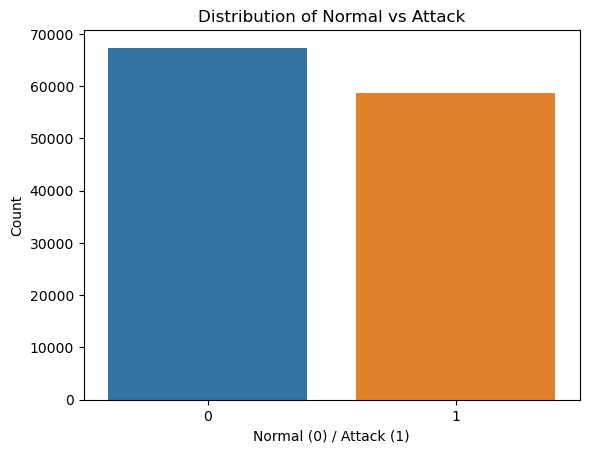

In [12]:
# Plot class distribution
sns.countplot(x=y)
plt.title("Distribution of Normal vs Attack")
plt.xlabel("Normal (0) / Attack (1)")
plt.ylabel("Count")
plt.show()


# Step 3 : Model Building

In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [36]:
# Handling Class Imbalance using SMOTE
# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [37]:
# Train a Supervised Model: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [16]:
# Model Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Normal", "Attack"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     20203
      Attack       1.00      1.00      1.00     17589

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792

Confusion Matrix:
[[20196     7]
 [   11 17578]]


In [53]:
# Train an Unsupervised Model: One-Class SVM
one_class_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)  # nu is the upper bound on contamination
one_class_svm.fit(X_train)
y_pred_svm = one_class_svm.predict(X_test)
# Convert One-Class SVM output to match target encoding: -1 for anomaly, 1 for normal
y_pred_svm = [1 if pred == -1 else 0 for pred in y_pred_svm]

In [54]:
print("\nOne-Class SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=["Normal", "Attack"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


One-Class SVM Classification Report:
              precision    recall  f1-score   support

      Normal       0.54      0.90      0.68     20203
      Attack       0.50      0.11      0.18     17589

    accuracy                           0.53     37792
   macro avg       0.52      0.51      0.43     37792
weighted avg       0.52      0.53      0.44     37792

Confusion Matrix:
[[18283  1920]
 [15684  1905]]


In [55]:
# Train Logistic Regression Model
logreg_model = LogisticRegression(random_state=42, class_weight='balanced', solver='lbfgs', max_iter=10000)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation
y_pred_logreg = logreg_model.predict(X_test)

In [56]:
# Print classification report and confusion matrix
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=["Normal", "Attack"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98     20203
      Attack       0.97      0.99      0.98     17589

    accuracy                           0.98     37792
   macro avg       0.98      0.98      0.98     37792
weighted avg       0.98      0.98      0.98     37792

Confusion Matrix:
[[19750   453]
 [  216 17373]]


In [27]:
import pickle

# Save the model to a file
with open('network_anomaly_detection_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
with open('one_hot_encoding.pkl', 'wb') as file:
    pickle.dump(one_hot_encoder, file)
with open('service_freq_encoding.pkl', 'wb') as file:
    pickle.dump(service_encoding, file)    
with open('flag_freq_encoding.pkl', 'wb') as file:
    pickle.dump(flag_freq_encoding, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Insights :

    1)Traffic Patterns:

        Common Protocols and Services: TCP and HTTP protocols are predominant, suggesting that typical network traffic is web-related. This could reflect user access patterns and the general use of network resources.
        
        Frequent Flags: Certain flags, like SF (successful connection) and S0 (connection attempt but no response), are observed more frequently. SF generally indicates normal traffic, while a high count of S0 might signal failed connection attempts or scanning behavior by potential attackers.
        
        Source and Destination Bytes: Patterns in srcbytes and dstbytes can reveal unusual data transfer rates, which could indicate large data uploads or downloads, often associated with suspicious activity. For example, if an attacker is exfiltrating data, the dstbytes values might be unusually high for specific connections.
        
    2)Attack Indicators:
    
        Attack Frequency: Analysis of the attack column shows that a majority of records fall under specific attack types (e.g., DoS, Probe). This can help prioritize detection strategies on more prevalent attack types.

        Login Success/Failures: The feature loggedin indicates whether the user successfully logged in. Analyzing combinations of loggedin with numfailedlogins and isguestlogin provides insights into potentially suspicious login attempts. An increase in failed login attempts without a subsequent successful login might suggest brute-force attacks.

    3)Behavioral Patterns of Anomalies:

        High serrorrate and rerrorrate Values: Many anomalies are linked with sessions showing high serrorrate (percentage of connections that have SYN errors) and rerrorrate (percentage of connections with REJ errors). High error rates can be red flags for misconfigured network devices or intentional denial-of-service activity.
        
        Service Access Diversity: Features like srvcount and srvserrorrate show the diversity of services accessed. Anomalies often include attempts to access multiple services rapidly, indicating potential probing behavior.

    4)Model Performance:

        Logistic Regression: Using logistic regression as an initial baseline model yields insights into feature importance and linear relationships in the data. While it’s useful for understanding direct relationships, it may struggle with the non-linearity in network anomaly detection.
        
        Random Forest Models: Tree-based models perform well, especially with highly imbalanced classes and complex data structures. Random forests capture non-linear interactions effectively, while isolation forests work well for detecting anomalies by isolating data points that deviate from clusters of normal behavior.

# Recommendations:

    1)Model Improvements:

        Advanced Anomaly Detection: Implement and evaluate anomaly detection models like Isolation Forests or Autoencoders, especially for unseen data points that might be missed by traditional classifiers.

        Hybrid Models: Consider a hybrid model that combines supervised models with unsupervised anomaly detection techniques. This allows for both known attack detection and the flexibility to discover novel patterns that deviate from normal traffic.

        Class Balancing Techniques: Given the potential imbalance in attack types, use techniques like Synthetic Minority Over-sampling (SMOTE) or class weighting in the model to improve detection accuracy for rare but impactful anomalies.

    2)Deployment and Monitoring:

        Real-Time Anomaly Detection System: Implement real-time anomaly detection with APIs that leverage the trained model. Deploy alerts for anomalies based on the confidence level of the prediction, with high-severity attacks triggering immediate notification to cybersecurity teams.

        Continuous Learning: Set up regular intervals for retraining the model with fresh network data to adapt to evolving threats, ensuring the model does not become outdated.

        Monitor False Positives and Negatives: Track the rate of false positives and negatives, especially for critical anomalies like DDoS attacks, to fine-tune the model over time.

    3)Security Enhancements:

        Restrict Access for Certain Services: Limit access to high-risk services based on the analysis (e.g., SSH, FTP) to reduce attack surfaces.
        
        Improve Network Segmentation: Segregate critical parts of the network to isolate high-value resources from general user access, reducing the impact of attacks and making it easier to monitor specific zones.
        
        User Behavior Analysis: Track user activity by analyzing loggedin and numfailedlogins to identify users or IPs that consistently fail to authenticate, which can signify potential insider threats or compromised accounts. 